<img src="https://github.com/djp840/MSDS_453_Public/blob/main/images/NorthwesternHeader.png?raw=1">

## MSDS453 - Research Assignment 01 - First Vectorized Representation


Our goal in this exercise is to BEGIN coming to a common agreement, among this class, as to what terms we will use as we selectively refine our corpus-wide vocabulary. This corpus vocabulary is what would represent the content of each different document for clustering and classification purposes, which will be our next step. This means that we need to make decisions - what is in, what is out.

### Importing Packages

In [63]:
import pandas as pd
import os
import numpy as np
import re
import string
from packaging import version

from numpy import array
from numpy import argmax

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize 
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import ngrams, FreqDist
from rake_nltk import Rake

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import cosine_similarity
from matplotlib import pyplot
from sklearn.cluster import DBSCAN
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, silhouette_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD as SVD
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import scikitplot as skplt
from sklearn.metrics import precision_recall_curve


import gensim

from gensim.models import Word2Vec,LdaMulticore, TfidfModel, CoherenceModel
from gensim import corpora
from gensim import similarities
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim import corpora
from gensim.models import LsiModel,LdaModel

<div class="alert alert-block alert-danger">
<b>Gensim</b> is a Python library for topic modelling, document indexing and similarity retrieval with large corpora. Target audience is the natural language processing (NLP) and information retrieval (IR) community <br><br>
    <b>https://pypi.org/project/gensim/ </b>
</div>

In [64]:
import pkg_resources
pkg_resources.require("gensim<=3.8.3");

In [65]:
print("Genism Version: ", gensim.__version__)

Genism Version:  3.8.3


### NLTK Downloads

In [66]:
# Only run this once, they will be downloaded.
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hag8665\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hag8665\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hag8665\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [67]:
import warnings
warnings.filterwarnings('ignore')

### Create List of Stop Words from NLTK

In [68]:
stop_words = set(stopwords.words("english"))

### Mount Google Drive to Colab Environment

In [69]:
#from google.colab import drive
#drive.mount('/content/gdrive')

### One-hot Encoding Example 

In [70]:
# define example
data = ['ginsburg', 'RBG', 'justice', 'ginsburg']
values = array(data)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
#print(onehot_encoded[0, :])
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
#print(inverted)

['ginsburg' 'RBG' 'justice' 'ginsburg']
[1 0 2 1]
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


## NLP Data Functions

### Pre-process dataset to remove punctuation

In [71]:
def remove_punctuation(in_text):
    # Remove punctuation
    text = re.sub('[^a-zA-Z]', ' ', str(in_text))
    return text

### Pre-process dataset to lower case it

In [72]:
def lower_case(in_text):
    # Convert to lowercase
    text = in_text.lower()    
    return text

### Pre-process dataset to remove tags

In [73]:
def remove_tags(in_text):    
    # Remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",in_text)
    return text

### Pre-process dataset to remove special characters and digits

In [74]:

def remove_special_chars_and_digits(in_text):
    # Remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",in_text)
    return text


### Pre-process dataset to appy Stemming

In [75]:
def apply_stemming(in_text):
    stemmer=PorterStemmer()
    word_list = nltk.word_tokenize(in_text)
    output = ' '.join([stemmer.stem(w) for w in word_list])
    return output

### Pre-process dataset to apply Lemmatization

In [76]:
def apply_lemmatization(in_text):
    # Lemmatization
    lem = WordNetLemmatizer()
    word_list = nltk.word_tokenize(in_text)
    output = ' '.join([lem.lemmatize(w) for w in word_list])
    return output

### Remove stop words

In [77]:
def remove_stop_words(in_text):
    stop_words = set(stopwords.words('english')) 
    word_tokens = word_tokenize(in_text)  
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
#     filtered_sentence = [] 
#     for w in word_tokens: 
#         if w not in stop_words: 
#             filtered_sentence.append(w) 

    return filtered_sentence

### Run Phase Machine

In [78]:
def run_phrase_machine(in_text):
    phrases=phrasemachine.get_phrases(in_text)
    return phrases

### Run Rake Keyword Extractor

In [79]:
def run_rake(in_text):
    r = Rake()
    r.extract_keywords_from_text(in_text)
    rake_phrases= r.get_ranked_phrases()
    return rake_phrases

### Run NLTK Tokenizer

In [80]:
def run_nltk_tokenizer(in_text):
    tokens=nltk.word_tokenize(in_text)
    return tokens

### Run NLTK Sentence Tokenizer

In [81]:
def run_nltk_sent_tokenizer(in_corpus):
    sents = nltk.sent_tokenize(in_corpus)
    return sents

### Run word-ngram Tokenizer

In [82]:
def run_nltk_tokenizer_word_ngrams(in_text, ngram_size):
    n_grams = ngrams(nltk.word_tokenize(in_text), ngram_size)
    return [ ' '.join(grams) for grams in n_grams]

### Get Frequency Distribution 

In [83]:
def get_freq_dist(terms):
    all_counts = dict()
    all_counts[size] = FreqDist(terms)
    return all_counts

### Processing Text into Lists

In [84]:
def get_corpus(path_to_file):
    #read in class corpus csv into python
    data=pd.read_csv(path_to_file)

    #create empty list to store text documents titles
    titles=[]
    docids=[]
    #for loop which appends the DSI title to the titles list
    for i in range(0,len(data)):
        docids.append(data['Doc_ID'].iloc[i])

    #for loop which appends the DSI title to the titles list
    for i in range(0,len(data)):
        titles.append(data['DSI_Title'].iloc[i])

    #create empty list to store text documents
    text_body=[]

    #for loop which appends the text to the text_body list
    for i in range(0,len(data)):
        temp_text=data['Text'].iloc[i]
        temp_text=clean_doc(temp_text)
        temp_text = ' '.join(map(str, temp_text))
        text_body.append(temp_text)
    return (docids,titles,text_body)

#  <font color='red'> methods3 for data wragling remove punctuation,stop words ,lemitization, lower and remove non alphabets

# function for data wrangling 

In [85]:
# method 3 remove punctutaion  , stopwords and lemetization, lower and keep character


def clean_doc(doc): 
    
    
    
    doc= remove_punctuation(doc)
    doc = lower_case(doc)
    #remove stop word
    doc = ' '.join(remove_stop_words(doc))
    #apply lemitization
    doc = apply_lemmatization(doc)
    #doc = ' '.join(run_rake(doc))
    #apply stemming
    #doc = apply_stemming(doc)
    #split document into individual words
    tokens= doc.split()   
    #tokens = list(filter(None, doc))
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    #remove remaining tokens that are not alphabetic
   

    #remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word.lower() for word in tokens]

    return tokens

#  <font color='red'> Functions to get  word2vec, doc2vec and  visualize documents

In [86]:
def process_corpus(data):
        
    #create empty list to store text documents titles
    titles=[]
    
    #for loop which appends the DSI title to the titles list
    for i in range(0,len(data)):
        temp_text=data['DSI_Title'].iloc[i]
        titles.append(temp_text)
    
    #create empty list to store text documents
    text_body=[]
    
    #for loop which appends the text to the text_body list
    for i in range(0,len(data)):
        temp_text=data['Text'].iloc[i]
        text_body.append(temp_text)
    
    #Note: the text_body is the unprocessed list of documents read directly form 
    #the csv.
        
    #empty list to store processed documents
    processed_text=[]
    #for loop to process the text to the processed_text list
    for i in text_body:
        text=clean_doc(i)
        processed_text.append(text)
    
    #Note: the processed_text is the PROCESSED list of documents read directly form 
    #the csv.  Note the list of words is separated by commas.
    
    
    #stitch back together individual words to reform body of text
    final_processed_text=[]
    
    for i in processed_text:
        temp_DSI=i[0]
        for k in range(1,len(i)):
            temp_DSI=temp_DSI+' '+i[k]
        final_processed_text.append(temp_DSI)
    
    return titles, final_processed_text, processed_text

def run_doc2vec(final_processed_text, processed_text):
    #create doc2vec matrix
    documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(final_processed_text)]
    model = Doc2Vec(documents, vector_size=300, window=3, min_count=2, workers=4)    
    
    doc2vec_df=pd.DataFrame()
    for i in range(0,len(processed_text)):
        vector=pd.DataFrame(model.infer_vector(processed_text[i])).transpose()
        doc2vec_df=pd.concat([doc2vec_df,vector], axis=0)
        
    return doc2vec_df

def run_word2vec(processed_text):

    #word to vec model
    model_w2v = Word2Vec(processed_text, size=300, window=3, min_count=2, workers=4)
    
    labels = []
    tokens = []

    for word in model_w2v.wv.vocab:
        tokens.append(model_w2v[word])
        labels.append(word)
    
    
    return labels, tokens, model_w2v


    

### Processing Text into Lists for tfidf

### Source Class Corpus  

In [87]:
path_to_file='C://Users//hag8665//Desktop//MSDS 453//Assignment_1//Class_Corpus_v2.csv'
docids,titles,text=get_corpus(path_to_file)


### Retreive Word Count Frequencies 

In [88]:
vectorizer = CountVectorizer(ngram_range = (1,1))
matrix=vectorizer.fit_transform(text)     

#creating datafram from TFIDF Matrix
words = vectorizer.get_feature_names()
matrix=pd.DataFrame(matrix.toarray(), columns=words, index=titles)
frequencies = matrix.sum().transpose().reset_index()
frequencies.columns = ['word', 'counts']
frequencies.sort_values("counts",ascending = False , inplace =True)
frequencies.head(10)

,word,counts
5197,film,1165
8880,movie,1026
9411,one,808
7910,like,667
13899,time,458
2164,character,424
8225,make,414
5761,get,412
13081,story,361
4742,even,355


In [89]:
frequencies.shape

(15479, 2)

# get and create data for word2vec and doc2vec

In [90]:
data = pd.read_csv(path_to_file)

### Create Word and Document Embedding

In [91]:
#cleans text to get processed text
titles, final_processed_text, processed_text = process_corpus(data)

# <font color='red'> method word2vec =300

In [92]:
#word to vec
model_w2v = Word2Vec(processed_text, size=300, window=5, min_count=1, workers=4)

#join all processed DSI words into single list
processed_text_w2v=[]
for i in processed_text:
    for k in i:
        processed_text_w2v.append(k)


In [93]:

#obtian all the unique words from DSI
w2v_words=list(set(processed_text_w2v))

#can also use the get_feature_names() from TFIDF to get the list of words
#w2v_words=Tfidf.get_feature_names()

#empty dictionary to store words with vectors
w2v_vectors={}

#for loop to obtain weights for each word
for i in w2v_words:
    temp_vec=model_w2v.wv[i]
    w2v_vectors[i]=temp_vec

#create a final dataframe to view word vectors
w2v_df=pd.DataFrame(w2v_vectors).transpose()

w2v_df.T.mean().sort_values( ascending = False)

adrenalised    0.000102
scape          0.000099
pundit         0.000099
thirst         0.000095
damnedest      0.000092
                 ...   
character     -0.021551
movie         -0.022305
one           -0.022802
like          -0.023289
film          -0.025382
Length: 15498, dtype: float32

In [94]:
len(w2v_vectors)

15498

#   <font color='red'> method doc2vec is 300 

### Create Doc2Vec Embedding

In [95]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(final_processed_text)]
model = Doc2Vec(documents, vector_size=300, window=2, min_count=1, workers=4)

doc2vec_df=pd.DataFrame()
for i in range(0,len(processed_text)):
    vector=pd.DataFrame(model.infer_vector(processed_text[i])).transpose()
    doc2vec_df=pd.concat([doc2vec_df,vector], axis=0)

doc2vec_df=doc2vec_df.reset_index()

doc_titles={'title': titles}
t=pd.DataFrame(doc_titles)

doc2vec_df=pd.concat([t, doc2vec_df], axis=1)

doc2vec_df=doc2vec_df.drop('index', axis=1)

doc2vec_df.head(10)

,title,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,HAG_Doc1_Frozen2,-0.001377,-0.000316,-0.000723,0.000746,0.000619,-0.001430,0.000481,-0.001196,-0.001369,...,-0.000695,-0.000943,-0.000436,0.000856,0.000673,-0.000367,-0.000514,0.000873,0.000531,0.000805
1,HAG_Doc2_Frozen2,0.000545,0.000187,0.000881,0.000779,-0.000291,0.000262,0.001022,-0.001230,-0.000437,...,0.000169,-0.000835,0.000002,0.001336,0.001037,-0.001457,-0.000874,0.001076,0.000895,-0.000664
2,HAG_Doc3_Frozen2,-0.008613,0.020293,0.025897,-0.021149,0.001342,0.009275,-0.013056,-0.011990,-0.016761,...,-0.004177,-0.010248,0.013964,0.001832,0.028127,0.013086,0.014580,0.009728,0.005191,0.011751
3,HAG_Doc4_Frozen2,0.000532,0.000136,-0.001308,0.000670,0.000528,0.000554,0.001076,-0.001447,0.000858,...,0.001267,0.000999,-0.000448,-0.000978,0.000187,0.000052,-0.001212,0.000372,0.001057,0.001192
4,HAG_Doc5_Frozen2,-0.000611,0.007227,0.009232,-0.006914,0.001412,0.003797,-0.003489,-0.002165,-0.006448,...,-0.004266,-0.005711,0.007802,-0.000747,0.017344,0.009067,0.010581,0.006653,0.003008,0.007486
5,HAG_Doc6_Frozen2,0.001111,0.000161,-0.000098,-0.001287,0.000846,-0.000803,-0.000520,-0.000338,-0.001035,...,-0.001561,0.000970,0.000408,-0.001042,-0.001419,0.000049,0.001618,-0.000566,0.000425,-0.000243
6,HAG_Doc7_Frozen2,-0.001347,0.002810,0.003992,-0.004136,-0.000236,0.000105,-0.001424,-0.002287,-0.002029,...,-0.001996,-0.000044,0.002264,-0.001157,0.003866,0.002881,0.002982,-0.000045,0.000803,0.002690
7,HAG_Doc8_Frozen2,-0.000650,-0.000154,0.001372,0.000232,-0.001461,0.001202,0.000585,-0.000290,0.000614,...,0.001140,0.000443,0.000342,0.000482,0.001453,0.001428,-0.000160,0.000685,0.000342,-0.000075
8,HAG_Doc9_Frozen2,0.000275,-0.001432,0.001519,0.000090,0.001614,-0.000424,-0.000143,0.000514,-0.000863,...,0.000544,-0.000260,-0.001056,0.001422,-0.000232,0.001313,0.001340,-0.000181,0.001198,0.000676
9,HAG_Doc10_Frozen2,0.001064,0.001508,-0.001646,0.000274,0.000672,-0.000726,-0.001575,0.001353,0.000246,...,0.000961,-0.001043,-0.001162,0.000271,0.000048,0.000158,0.000333,-0.000363,0.001080,0.001350


In [96]:
len(processed_text[248])

445

### Functions Process Text and Create the Required TFIDF and Doc2vec Matrices

In [97]:
# #functions used to 
# def clean_doc(doc): 
#     #split document into individual words
#     tokens=doc.split()
#     re_punc = re.compile('[%s]' % re.escape(string.punctuation))
#     # remove punctuation from each word
#     tokens = [re_punc.sub('', w) for w in tokens]
#     # remove remaining tokens that are not alphabetic
#     tokens = [word for word in tokens if word.isalpha()]
#     # filter out short tokens
#     tokens = [word for word in tokens if len(word) > 4]
#     #lowercase all words
#     tokens = [word.lower() for word in tokens]
#     # filter out stop words
#     stop_words = set(stopwords.words('english'))
#     tokens = [w for w in tokens if not w in stop_words]         
#     # word stemming    
#     # ps=PorterStemmer()
#     # tokens=[ps.stem(word) for word in tokens]
#     return tokens

# def final_processed_text(doc):
#     #this is a function to join the processed text back
#     ' '.join(doc)
#     return doc

def tfidf(corpus, titles, ngram_range = (1,1),  norm=None, lowercase=False):
    #this is a function to created the tfidf matrix
    Tfidf=TfidfVectorizer(ngram_range= ngram_range, norm= norm, lowercase=lowercase)

    #fit the vectorizer using final processed documents.  The vectorizer requires the 
    #stiched back together document.

    TFIDF_matrix=Tfidf.fit_transform(corpus)     

    #creating datafram from TFIDF Matrix
    words = Tfidf.get_feature_names()
    matrix=pd.DataFrame(TFIDF_matrix.toarray(), columns=Tfidf.get_feature_names(), index=titles)
    return matrix


def One_Hot(variable):
    #this is a function to one hot encode the classes
    LE=LabelEncoder()
    LE.fit(variable)
    Label1=LE.transform(variable)
    OHE=OneHotEncoder()
    labels=OHE.fit_transform(Label1.reshape(-1,1)).toarray()
    return labels



### Load Data For Analysis

In [98]:
#read in class corpus csv into python
data=pd.read_csv('C://Users//hag8665//Desktop//MSDS 453//Assignment_1//Class_Corpus_v2.csv')

### Dataframe Store the Processed Text and Tokenized text

In [99]:
#adding two columns to the dataframe to store the processed text and tokenized text
data['processed_text'] = data['Text'].apply(lambda x: clean_doc(x))



#creating final processed text variables for matrix creation
final_processed_text = [' '.join(x) for x in data['processed_text'].tolist()]
titles = data['DSI_Title'].tolist()
processed_text = data['processed_text'].tolist()


#generate tfidf for analysis
tfidf_matrix = tfidf(final_processed_text, titles, ngram_range = (1,1))

### Apply Labels 

In [100]:
labels = data['Review Type (pos or neg)'].apply(lambda x: 0 if x.lower().split(' ')[0] == 'negative' else 1)


# Functionto split data

In [101]:

def split_data(x,y):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, shuffle= True, stratify =labels, random_state=42)
    return X_train, X_test, y_train, y_test


# create data

In [102]:
X_train, X_test, y_train, y_test= split_data(tfidf_matrix,labels)

In [103]:
def get_acc(model):
    
    predictions_t = model.predict(X_train)
    train_acc = accuracy_score(y_train, predictions_t)
    predictions = model.predict(X_test)
    test_acc = accuracy_score(y_test, predictions)
    
    
    f1 = f1_score(y_test, predictions)
    return  test_acc, train_acc,f1

In [104]:
def get_roc(model, proba=True):
    if proba:
        y_score = model.predict.proba(X_test)
    else:
        y_score = model.fit(X_train, y_train).decision_function(X_test)
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
       

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show() 

In [105]:
def acc_score(model= model, x_test= X_test,y_test= y_test):
    return np.mean(cross_val_score(model,x_test,y_test,cv=k_fold,scoring="accuracy"))

In [106]:
def confusion_matrix_model(model_used = model, x_test= X_test,y_test= y_test):
    cm=confusion_matrix(y_test,model_used.predict(x_test))
    col=["Predicted Dead","Predicted Survived"]
    cm=pd.DataFrame(cm)
    cm.columns=["Predicted Dead","Predicted Survived"]
    cm.index=["Actual Dead","Actual Survived"]
    cm[col]=np.around(cm[col].div(cm[col].sum(axis=1),axis=0),decimals=2)
    return cm

In [107]:
def importance_of_features(model=model, x_train= X_train):
    features = pd.DataFrame()
    features['feature'] = x_train.columns
    features['importance'] = model.feature_importances_
    features.sort_values(by=['importance'], ascending=True, inplace=True)
    features.set_index('feature', inplace=True)
    return features.plot(kind='barh', figsize=(10,10))

In [108]:
def aucscore(model=model, x_test=X_test, y_test= y_test,has_proba=True):
    if has_proba:
        fpr,tpr,thresh=skplt.metrics.roc_curve(y_test,model.predict_proba(x_test)[:,1])
    else:
        fpr,tpr,thresh=skplt.metrics.roc_curve(y_test,model.decision_function(x_test))
    x=fpr
    y=tpr
    auc= skplt.metrics.auc(x,y)
    return auc

def plt_roc_curve(name,model=model, x_test= X_test,y_test= y_test,has_proba=True):
    if has_proba:
        fpr,tpr,thresh=skplt.metrics.roc_curve(y_test,model.predict_proba(x_test)[:,1])
    else:
        fpr,tpr,thresh=skplt.metrics.roc_curve(y_test,model.decision_function(x_test))
    x=fpr
    y=tpr
    auc= skplt.metrics.auc(x,y)
    plt.plot(x,y,label='ROC curve for %s (AUC = %0.2f)' % (name, auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim((0,1))
    plt.ylim((0,1))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

In [109]:
def conf_mat_n(model = model, x_test = X_test, y_test= y_test ):
    skplt.metrics.plot_confusion_matrix(y_test, model.predict(x_test),normalize=True, figsize=(10,10))

In [110]:
def conf_mat(model = model, x_test = X_test, y_test= y_test):
    mtx = confusion_matrix(y_test, model.predict(x_test))
    # define classes 
    classes = ["negative", "postive"]
    temp_df = pd.DataFrame(data=mtx,columns=classes)
    temp_df.index = classes
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(temp_df, annot=True, fmt='d', linewidths=.75,  cbar=False, ax=ax,cmap='Blues',linecolor='white')
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')

In [111]:
def plt_prc(name,model=model, x_test= X_test,y_test= y_test):

    precision, recall, thresholds = precision_recall_curve(y_test, model.predict(x_test))
    area = auc(recall, precision)
    print ("Area Under Curve: %0.2f" % area)
  

    plt.clf()
    plt.plot(recall, precision, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Logistic regression: PR-AUC=%0.2f' % area)
    plt.legend(loc="lower left")
    plt.show()

In [112]:
def cl_report(model = model, x_test = X_test, y_test= y_test ,x_train= X_train, y_train =y_train):
    print("train: \n", classification_report(y_train, model.predict(x_train)), "\n",
          "test: \n",  classification_report(y_test, model.predict(x_test)))

In [113]:
#     n_classes = 1
#     y_score = model.fit(X_train, y_train).decision_function(X_test)
#     # Compute ROC curve and ROC area for each class
#     fpr = dict()
#     tpr = dict()
#     roc_auc = dict()
#     fpr[i], tpr[i], _ = roc_curve(y_test[:], y_score[:])
#     roc_auc[i] = auc(fpr[i], tpr[i])

#     # Compute micro-average ROC curve and ROC area
#     fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
#     roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
#     lw = 2
#     plt.plot(
#         fpr[2],
#         tpr[2],
#         color="darkorange",
#         lw=lw,
#         label="ROC curve (area = %0.2f)" % roc_auc[2],
#     )
#     plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel("False Positive Rate")
#     plt.ylabel("True Positive Rate")
#     plt.title("Receiver operating characteristic example")
#     plt.legend(loc="lower right")
#     plt.show()


### Load Data For Analysis

In [114]:
#read in class corpus csv into python
data=pd.read_csv('C://Users//hag8665//Desktop//MSDS 453//Assignment_1//Class_Corpus_v2.csv')

### Dataframe Store the Processed Text and Tokenized text

In [166]:
#adding two columns to the dataframe to store the processed text and tokenized text
data['processed_text'] = data['Text'].apply(lambda x: clean_doc(x))



#creating final processed text variables for matrix creation
final_processed_text = [' '.join(x) for x in data['processed_text'].tolist()]
titles = data['DSI_Title'].tolist()
processed_text = data['processed_text'].tolist()


#generate tfidf for analysis
tfidf_matrix = tfidf(final_processed_text, titles, ngram_range = (1,1))

In [116]:
# reduce dimension 

# 2. Univariate Feature Selection with SelectKBest

In [117]:
# from sklearn.feature_selection import SelectKBest, mutual_info_regression
# #Select top 2 features based on mutual info regression
# selector = SelectKBest(mutual_info_regression, k =100)
# selector.fit(tfidf_matrix, labels)
# tfidf_matrix.columns[selector.get_support()]

In [118]:
#tfidf_matrix.columns#[selector.get_support()]

In [119]:
#tfidf_matrix= tfidf_matrix[[tfidf_matrix.columns[selector.get_support()]]]

# 1. Variance Threshold Feature Selection

In [120]:
# from sklearn.feature_selection import VarianceThreshold
# selector = VarianceThreshold(0.5)
# selector.fit(tfidf_matrix)
# tfidf_matrix.columns[selector.get_support()]

In [121]:
# tfidf_matrix= tfidf_matrix[tfidf_matrix.columns[selector.get_support()]]

# 4. Feature Selection via SelectFromModel

In [122]:
# from sklearn.feature_selection import SelectFromModel

In [123]:
# sel = SelectFromModel(estimator=LogisticRegression())
# sel.fit(tfidf_matrix, labels)

In [124]:
# len(sel.get_support())

In [125]:
# tfidf_matrix= tfidf_matrix[tfidf_matrix.columns[(sel.get_support())]]


In [126]:
tfidf_matrix.shape

(249, 15479)

In [167]:
svd = TruncatedSVD(n_components=250)
tfidf_matrix= svd.fit_transform(tfidf_matrix)

In [168]:
# tfidf_matrix = pca.fit_transform(tfidf_matrix)

In [169]:
# tfidf_matrix.shape

### Apply Labels 

In [170]:
labels = data['Review Type (pos or neg)'].apply(lambda x: 0 if x.lower().split(' ')[0] == 'negative' else 1)


# Functionto split data

In [171]:

def split_data(x,y):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, shuffle= True, stratify =labels, random_state=42)
    return X_train, X_test, y_train, y_test


# create data

In [172]:
X_train, X_test, y_train, y_test= split_data(tfidf_matrix,labels)

In [173]:
def get_acc(model):
    
    predictions_t = model.predict(X_train)
    train_acc = accuracy_score(y_train, predictions_t)
    predictions = model.predict(X_test)
    test_acc = accuracy_score(y_test, predictions)
    
    
    f1 = f1_score(y_test, predictions)
    return  test_acc, train_acc,f1

In [174]:
def get_roc(model, proba=True):
    if proba:
        y_score = model.predict.proba(X_test)
    else:
        y_score = model.fit(X_train, y_train).decision_function(X_test)
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
       

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show() 

In [175]:
def acc_score(model= model, x_test= X_test,y_test= y_test):
    return np.mean(cross_val_score(model,x_test,y_test,cv=k_fold,scoring="accuracy"))

In [176]:
def confusion_matrix_model(model_used = model, x_test= X_test,y_test= y_test):
    cm=confusion_matrix(y_test,model_used.predict(x_test))
    col=["Predicted Dead","Predicted Survived"]
    cm=pd.DataFrame(cm)
    cm.columns=["Predicted Dead","Predicted Survived"]
    cm.index=["Actual Dead","Actual Survived"]
    cm[col]=np.around(cm[col].div(cm[col].sum(axis=1),axis=0),decimals=2)
    return cm

In [177]:
def importance_of_features(model=model, x_train= X_train):
    features = pd.DataFrame()
    features['feature'] = x_train.columns
    features['importance'] = model.feature_importances_
    features.sort_values(by=['importance'], ascending=True, inplace=True)
    features.set_index('feature', inplace=True)
    return features.plot(kind='barh', figsize=(10,10))

In [178]:
def aucscore(model=model, x_test=X_test, y_test= y_test,has_proba=True):
    if has_proba:
        fpr,tpr,thresh=skplt.metrics.roc_curve(y_test,model.predict_proba(x_test)[:,1])
    else:
        fpr,tpr,thresh=skplt.metrics.roc_curve(y_test,model.decision_function(x_test))
    x=fpr
    y=tpr
    auc= skplt.metrics.auc(x,y)
    return auc

def plt_roc_curve(name,model=model, x_test= X_test,y_test= y_test,has_proba=True):
    if has_proba:
        fpr,tpr,thresh=skplt.metrics.roc_curve(y_test,model.predict_proba(x_test)[:,1])
    else:
        fpr,tpr,thresh=skplt.metrics.roc_curve(y_test,model.decision_function(x_test))
    x=fpr
    y=tpr
    auc= skplt.metrics.auc(x,y)
    plt.plot(x,y,label='ROC curve for %s (AUC = %0.2f)' % (name, auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim((0,1))
    plt.ylim((0,1))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

In [179]:
def conf_mat_n(model = model, x_test = X_test, y_test= y_test ):
    skplt.metrics.plot_confusion_matrix(y_test, model.predict(x_test),normalize=True, figsize=(10,10))

In [180]:
def conf_mat(model = model, x_test = X_test, y_test= y_test):
    mtx = confusion_matrix(y_test, model.predict(x_test))
    # define classes 
    classes = ["negative", "postive"]
    temp_df = pd.DataFrame(data=mtx,columns=classes)
    temp_df.index = classes
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(temp_df, annot=True, fmt='d', linewidths=.75,  cbar=False, ax=ax,cmap='Blues',linecolor='white')
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')

In [181]:
def plt_prc(name,model=model, x_test= X_test,y_test= y_test):

    precision, recall, thresholds = precision_recall_curve(y_test, model.predict(x_test))
    area = auc(recall, precision)
    print ("Area Under Curve: %0.2f" % area)
  

    plt.clf()
    plt.plot(recall, precision, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Logistic regression: PR-AUC=%0.2f' % area)
    plt.legend(loc="lower left")
    plt.show()

In [182]:
def cl_report(model = model, x_test = X_test, y_test= y_test ,x_train= X_train, y_train =y_train):
    print("train: \n", classification_report(y_train, model.predict(x_train)), "\n",
          "test: \n",  classification_report(y_test, model.predict(x_test)))

### Support Vector Machines

In [183]:
svm_model= SVC()
svm_model = svm_model.fit(X_train,y_train)

In [184]:
svm_test_acc, svm_train_acc, f1 = get_acc(svm_model)

print("train acc: ", svm_train_acc,"\n", "test acc: ",svm_test_acc ,"\n",f1)

train acc:  1.0 
 test acc:  0.3855421686746988 
 0.42696629213483145


### metrics

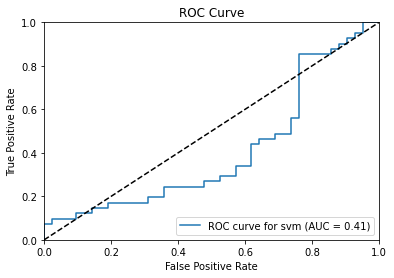

In [185]:
plt_roc_curve("svm",model = svm_model, has_proba=False)

Area Under Curve: 0.56


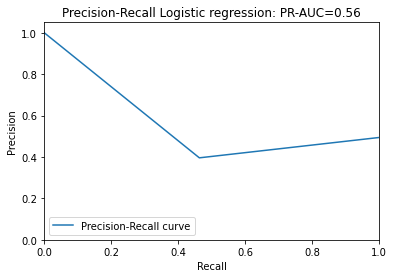

In [186]:
plt_prc("svm",model = svm_model)

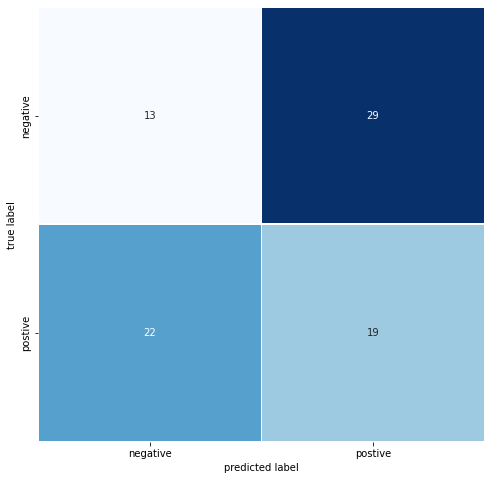

In [187]:
conf_mat(model=svm_model)

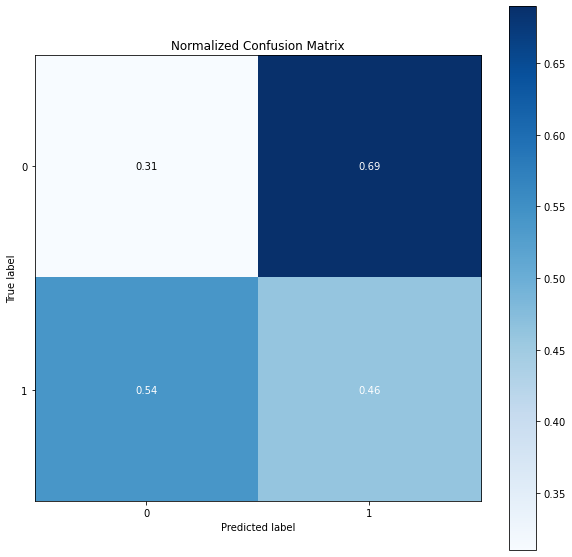

In [188]:
conf_mat_n(model=svm_model)

In [189]:
cl_report(model = svm_model)

train: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00        83

    accuracy                           1.00       166
   macro avg       1.00      1.00      1.00       166
weighted avg       1.00      1.00      1.00       166
 
 test: 
               precision    recall  f1-score   support

           0       0.37      0.31      0.34        42
           1       0.40      0.46      0.43        41

    accuracy                           0.39        83
   macro avg       0.38      0.39      0.38        83
weighted avg       0.38      0.39      0.38        83



### Naive Bayes

In [190]:
nb_model = MultinomialNB()
nb_model = nb_model.fit(X_train,y_train)

ValueError: Negative values in data passed to MultinomialNB (input X)

In [191]:
nb_test_acc, nb_train_acc,f1 = get_acc(nb_model)

print("train acc: ", nb_train_acc,"\n", "test acc: ",nb_test_acc,"\n",f1)

AttributeError: 'MultinomialNB' object has no attribute 'feature_log_prob_'

### metrics

In [192]:
plt_roc_curve("NB",model = nb_model, has_proba=True)

AttributeError: 'MultinomialNB' object has no attribute 'feature_log_prob_'

In [193]:
plt_prc("svm",model = nb_model)

AttributeError: 'MultinomialNB' object has no attribute 'feature_log_prob_'

In [194]:
conf_mat(model=nb_model)

AttributeError: 'MultinomialNB' object has no attribute 'feature_log_prob_'

In [195]:
conf_mat_n(model=nb_model)

AttributeError: 'MultinomialNB' object has no attribute 'feature_log_prob_'

In [196]:
cl_report(model = nb_model)

AttributeError: 'MultinomialNB' object has no attribute 'feature_log_prob_'

### Random Forest

In [197]:
rf_model = RandomForestClassifier(n_estimators=150,bootstrap=False,min_samples_leaf=4)
rf_model = rf_model.fit(X_train,y_train)

In [198]:
rf_test_acc, rf_train_acc,f1 = get_acc(rf_model)

print("train acc: ", rf_train_acc,"\n", "test acc: ",rf_test_acc,"\n",f1)

train acc:  1.0 
 test acc:  0.5421686746987951 
 0.5957446808510638


### metrics

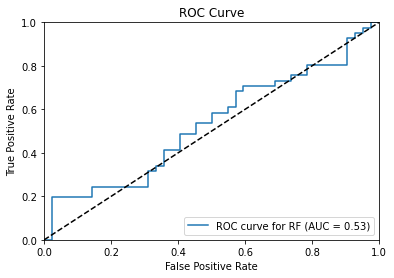

In [199]:
plt_roc_curve("RF",model = rf_model, has_proba=True)

Area Under Curve: 0.68


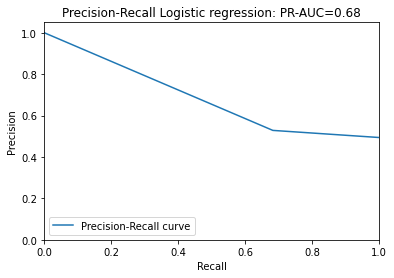

In [200]:
plt_prc("rf",model = rf_model)

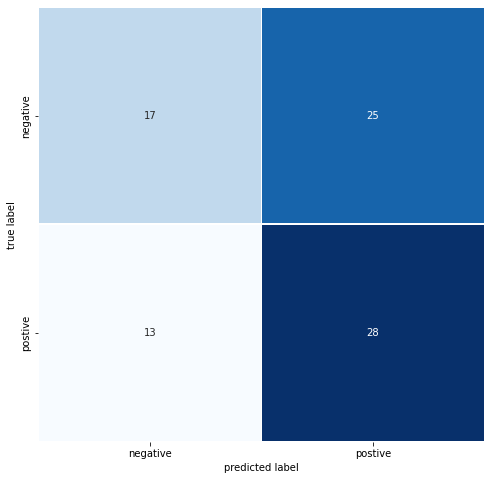

In [201]:
conf_mat(model=rf_model)

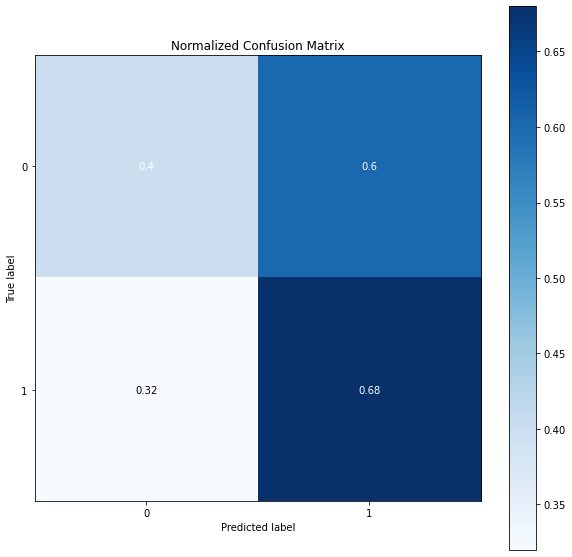

In [202]:
conf_mat_n(model=rf_model)

In [203]:
cl_report(model = rf_model)

train: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00        83

    accuracy                           1.00       166
   macro avg       1.00      1.00      1.00       166
weighted avg       1.00      1.00      1.00       166
 
 test: 
               precision    recall  f1-score   support

           0       0.57      0.40      0.47        42
           1       0.53      0.68      0.60        41

    accuracy                           0.54        83
   macro avg       0.55      0.54      0.53        83
weighted avg       0.55      0.54      0.53        83



# Logistic Regression

In [204]:
lr_model = model = LogisticRegression(solver='liblinear')
lr_model = lr_model.fit(X_train,y_train)

In [205]:
lr_test_acc, lr_train_acc,f1 = get_acc(lr_model)

print("train acc: ", lr_train_acc,"\n", "test acc: ",lr_test_acc,"\n",f1)

train acc:  1.0 
 test acc:  0.5180722891566265 
 0.5121951219512195


### metrics

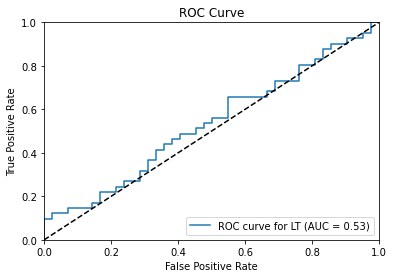

In [206]:
plt_roc_curve("LT",model = lr_model, has_proba=True)

Area Under Curve: 0.63


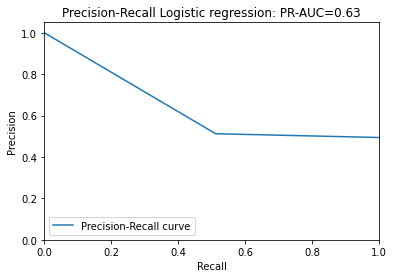

In [207]:
plt_prc("LR",model = lr_model)

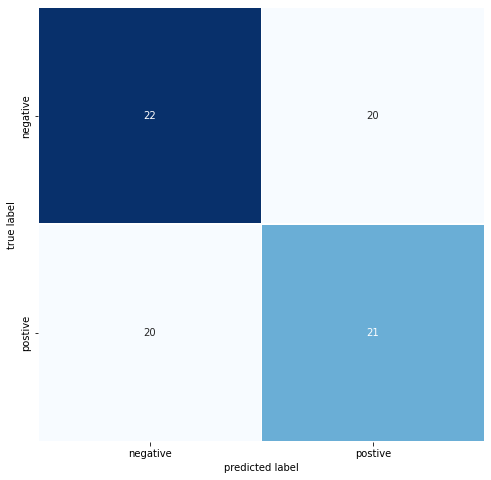

In [208]:
conf_mat(model=lr_model)

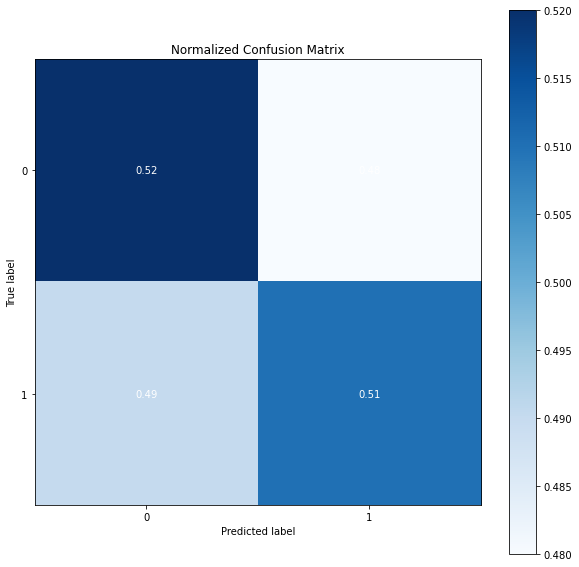

In [209]:
conf_mat_n(model=lr_model)

In [210]:
cl_report(model = lr_model)

train: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00        83

    accuracy                           1.00       166
   macro avg       1.00      1.00      1.00       166
weighted avg       1.00      1.00      1.00       166
 
 test: 
               precision    recall  f1-score   support

           0       0.52      0.52      0.52        42
           1       0.51      0.51      0.51        41

    accuracy                           0.52        83
   macro avg       0.52      0.52      0.52        83
weighted avg       0.52      0.52      0.52        83



In [211]:
# get feature impotance

In [212]:

# from sklearn.metrics import r2_score
# from rfpimp import permutation_importances

# def r2(rf, X_train, y_train):
#     return r2_score(y_train, rf.predict(X_train))

# perm_imp_rfpimp = permutation_importances(rf_model, X_train, y_train, r2)

In [213]:
# import eli5
# from eli5.sklearn import PermutationImportance

# perm = PermutationImportance(rf_model, cv = None, refit = False, n_iter = 50).fit(X_train, y_train)
# perm_imp_eli5 = imp_df(X_train.columns, perm.feature_importances_)

# Grid search to optimize parameters


In [214]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = param_grid = { 
            "n_estimators"      : [100,125,150],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_estimator_

In [ ]:
grid_search.best_estimator_

In [ ]:
best_grid = grid_search.best_estimator_
grid_accuracy = get_acc(best_grid)

In [ ]:
grid_accuracy

# 4. Feature Selection via SelectFromModel

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 50))
sel.fit(tfidf_matrix, labels)

In [ ]:
sel.get_support()

In [ ]:
selected_feat= tfidf_matrix.columns[(sel.get_support())]
len(selected_feat)

In [ ]:
selected_feat

# 1. Variance Threshold Feature Selection

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(0.5)
selector.fit(tfidf_matrix)
tfidf_matrix.columns[selector.get_support()]

# 2. Univariate Feature Selection with SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
#Select top 2 features based on mutual info regression
selector = SelectKBest(mutual_info_regression, k =100)
selector.fit(tfidf_matrix, labels)
tfidf_matrix.columns[selector.get_support()]

# 3. Recursive Feature Elimination (RFE)

In [ ]:
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression
# # #Selecting the Best important features according to Logistic Regression

# rfe_selector = RFE(estimator=LogisticRegression(),n_features_to_select = 500, step = 1)
# rfe_selector.fit(tfidf_matrix, labels)
# tfidf_matrix.columns[rfe_selector.get_support()]

# 5. Feature Selection Sequential Feature Selection (SFS)

In [ ]:
# from sklearn.feature_selection import SequentialFeatureSelector
# #Selecting the Best important features according to Logistic Regression
# sfs_selector = SequentialFeatureSelector(estimator=LogisticRegression(), n_features_to_select =500, cv =10, direction ='backward')
# sfs_selector.fit(tfidf_matrix, labels)
# tfidf_matrix.columns[sfs_selector.get_support()]

In [ ]:
import sklearn
print(sklearn.__version__)